In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.iloc[30:40]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
30,4.8,3.1,1.6,0.2
31,5.4,3.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
34,4.9,3.1,1.5,0.2
35,5.0,3.2,1.2,0.2
36,5.5,3.5,1.3,0.2
37,4.9,3.6,1.4,0.1
38,4.4,3.0,1.3,0.2
39,5.1,3.4,1.5,0.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [21]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
# k =3

In [36]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3,random_state=42)
df['k_clust']= k_means.fit_predict(df)
print(df['k_clust'])



0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    2
147    0
148    0
149    2
Name: k_clust, Length: 150, dtype: int32


C:\Users\ranje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
kl=np.unique(k_clust)
kl

array([0, 1, 2])

In [38]:
df.k_clust.value_counts()

k_clust
2    61
1    50
0    39
Name: count, dtype: int64

In [40]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2)
pca_opt = pca.fit_transform(df)


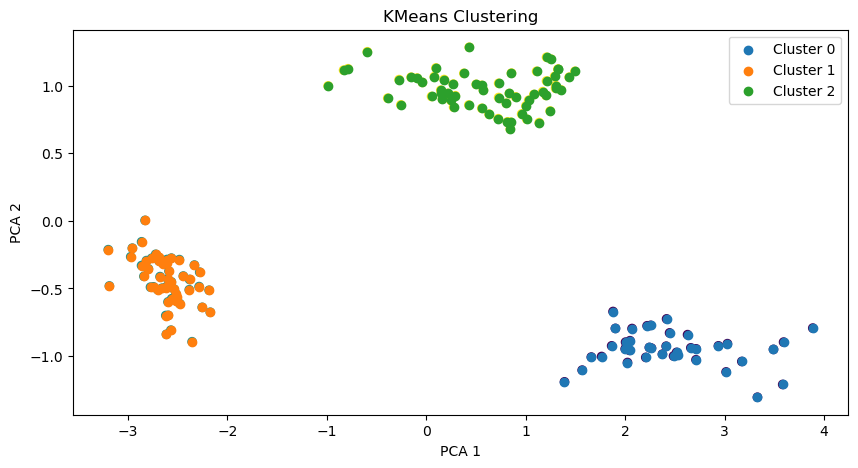

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(pca_opt[:,0],pca_opt[:,1],c=k_clust)
for cluster in kl:
    data_points = pca_opt[k_clust == cluster]
    plt.scatter(data_points[:, 0], data_points[:, 1], label=f"Cluster {cluster}")

plt.title('KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


In [44]:
from sklearn.metrics import silhouette_score

score = silhouette_score(pca_opt, k_clust)
print(f"Silhouette Score: {score:.3f}")

# Evaluated using silhouette_score, distance between the centroids in clusters is good.


Silhouette Score: 0.782


In [46]:
# Elbow method

In [48]:
sse = []
mean_value = range(1,10)
for k in mean_value:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

C:\Users\ranje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ranje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ranje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ranje\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Sum of squared error')

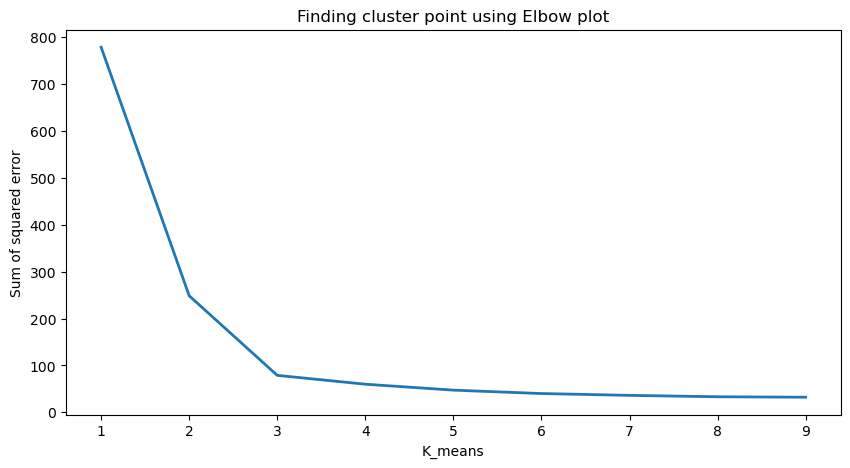

In [50]:
plt.figure(figsize=(10,5))
plt.plot(mean_value, sse, linewidth=2, markersize=12)
plt.title('Finding cluster point using Elbow plot')
plt.xlabel('K_means')
plt.ylabel('Sum of squared error')


The reason behind the Kmeans is suitable : The clusters were relatively sepaerated into three. Here the value of k is 3. 
Based on  that divid the clusters.

In [53]:
# Hierarchical Clustering

In [55]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering



In [57]:
linked_method = linkage(df,method='ward')

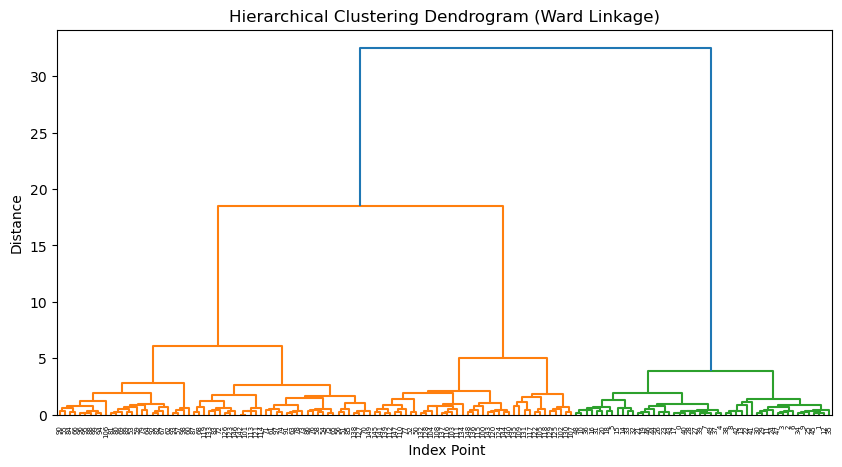

In [59]:
plt.figure(figsize=(10, 5))
dendrogram(linked_method,orientation='top',distance_sort='descending') # in linkage method use the ward.
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel(' Index Point')
plt.ylabel('Distance')
plt.show()

In [60]:
# cluster using AgglomerativeClustering.
agg_model =  AgglomerativeClustering(n_clusters=3,linkage='ward')
new_model =agg_model.fit_predict(df)

In [61]:
new_model

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [65]:
kl2=np.unique(new_model)
kl2
df.value_counts(new_model)

0    61
1    50
2    39
Name: count, dtype: int64

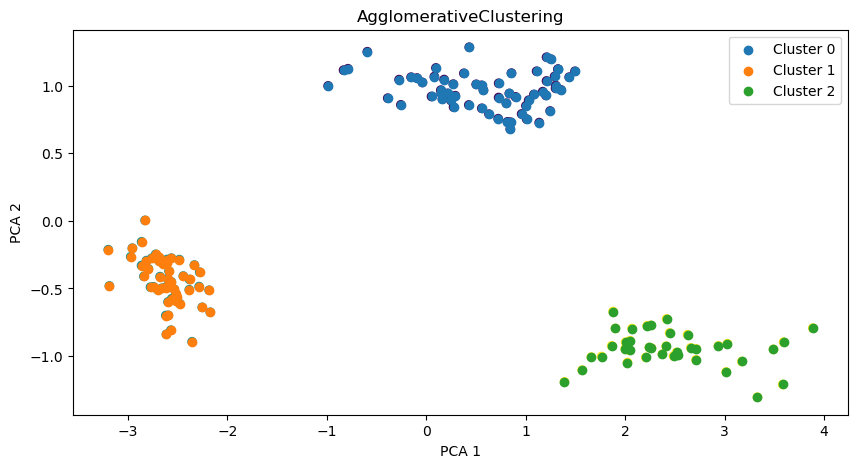

In [71]:
pca2 =PCA(n_components=2)
pca_opt2 = pca2.fit_transform(df)
plt.figure(figsize=(10,5))
plt.scatter(pca_opt2[:,0],pca_opt2[:,1],c=new_model)
for clusters in kl2:
    data_points = pca_opt[new_model == clusters]
    plt.scatter(data_points[:, 0], data_points[:, 1], label=f"Cluster {clusters}")

plt.title('AgglomerativeClustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In Hierarchical Clustering analysis using the same feature name find the same result which is find in Kmeans. The clusters were
divided into three groups. we can see in dendogram the clusters divided into three. Meanwhile, using the agglomerative Clustering 
we divided into three groups based on the same feature 'Specices', the output is same.And using scatter plot visualize it.